
# Unsupervised Learning Lab: Evaluation Metrics

## Introduction
In this lab, you will evaluate the performance of the customer segmentation models that you created yesterday. You will use various evaluation metrics for unsupervised learning to assess the quality of the clusters.

### Evaluation Metrics
The following metrics will be used to evaluate the clustering models:
1. Silhouette Score
2. Davies-Bouldin Index
3. Calinski-Harabasz Index

## Exercise 1: Calculate Silhouette Score
1. Calculate the Silhouette Score for the K-Means clustering model.
2. Calculate the Silhouette Score for the Hierarchical clustering model.
3. Calculate the Silhouette Score for the DBSCAN clustering model.

## Exercise 2: Calculate Davies-Bouldin Index
1. Calculate the Davies-Bouldin Index for the K-Means clustering model.
2. Calculate the Davies-Bouldin Index for the Hierarchical clustering model.
3. Calculate the Davies-Bouldin Index for the DBSCAN clustering model.

## Exercise 3: Calculate Calinski-Harabasz Index
1. Calculate the Calinski-Harabasz Index for the K-Means clustering model.
2. Calculate the Calinski-Harabasz Index for the Hierarchical clustering model.
3. Calculate the Calinski-Harabasz Index for the DBSCAN clustering model.

### Instructions
1. Load the dataset and the clustering results from the previous lab.
2. Use the `sklearn.metrics` module to calculate the evaluation metrics.
3. Interpret the results and compare the performance of the different clustering models.


In [15]:
import pandas as pd
import numpy as np

from sklearn import cluster
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [16]:
#Evaluation metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [17]:
df = pd.read_csv("C:\\Users\\ramya\\Downloads\\customer_data.csv")
df

df.describe()

df = df.drop(columns = ['CustomerID'])

df.isnull().sum()

df_scaled = StandardScaler().fit_transform(df)

df = pd.DataFrame(df_scaled, columns = df.columns)

df

,Age,AnnualIncome,SpendingScore
0,0.853003,0.395549,0.331292
1,1.729608,-0.016514,-0.542232
2,0.178692,-0.292815,1.528345
3,-0.765343,-1.578610,1.269522
4,1.122728,0.441453,0.104823
...,...,...,...
95,-0.091032,1.616391,-0.801054
96,1.257590,1.636381,0.169528
97,0.987866,-1.209187,-0.509880
98,0.178692,0.562844,-0.801054


# Kmeans

In [64]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
df["KMeans_Cluster"] = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
df["KMeans_Cluster"]

0     1
1     1
2     2
3     2
4     1
     ..
95    0
96    1
97    2
98    1
99    2
Name: KMeans_Cluster, Length: 100, dtype: int32

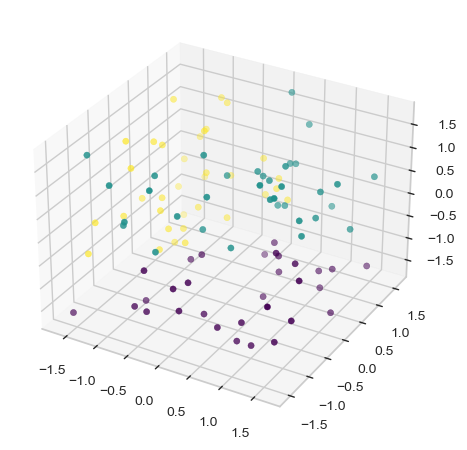

<Figure size 1000x1000 with 0 Axes>

In [100]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ="3d")
plt.figure(figsize=(10, 10))
ax.scatter3D(df['AnnualIncome'], df['SpendingScore'], df['Age'],c=df['KMeans_Cluster'], cmap='viridis')
plt.show()

In [66]:
sil_score = silhouette_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df["KMeans_Cluster"])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.27408167479057666


In [67]:
ch_score = calinski_harabasz_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df["KMeans_Cluster"])
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 39.44726630374726


In [68]:
db_score = davies_bouldin_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df["KMeans_Cluster"])
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.2658255184837606


# Agglomerative Hierarchical Clustering

In [103]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
df["Hierarchical_Cluster"] = agglomerative.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])

In [104]:
df["Hierarchical_Cluster"]

0     0
1     0
2     1
3     1
4     0
     ..
95    2
96    0
97    0
98    0
99    1
Name: Hierarchical_Cluster, Length: 100, dtype: int64

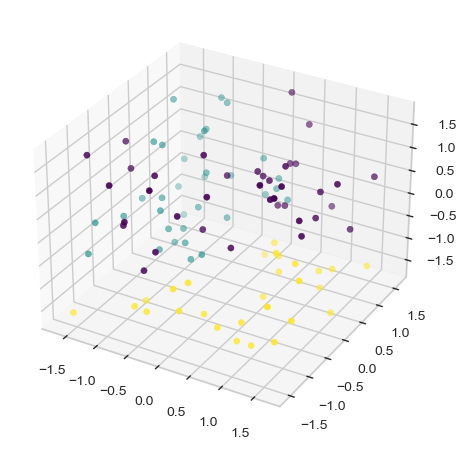

<Figure size 1000x1000 with 0 Axes>

In [105]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ="3d")
plt.figure(figsize=(10, 10))
ax.scatter3D(df['AnnualIncome'], df['SpendingScore'], df['Age'],c=df["Hierarchical_Cluster"], cmap='viridis')
plt.show()

In [106]:
sil_score = silhouette_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df["Hierarchical_Cluster"])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.267480561757965


In [107]:
ch_score = calinski_harabasz_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df["Hierarchical_Cluster"])
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 38.14471560322632


In [108]:
db_score = davies_bouldin_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df["Hierarchical_Cluster"])
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.2799160785224821


#  DBSCAN Clustering

In [122]:
dbscan = DBSCAN(eps=0.5, min_samples = 4)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore']])

In [123]:
df['DBSCAN_Cluster']

0     0
1    -1
2     3
3    -1
4     0
     ..
95   -1
96   -1
97   -1
98   -1
99   -1
Name: DBSCAN_Cluster, Length: 100, dtype: int64

In [124]:
df['DBSCAN_Cluster'].unique()

array([ 0, -1,  3,  1,  2,  4], dtype=int64)

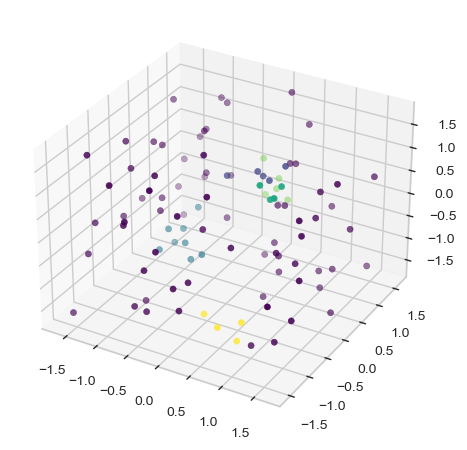

<Figure size 1000x1000 with 0 Axes>

In [125]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ="3d")
plt.figure(figsize=(10, 10))
ax.scatter3D(df['AnnualIncome'], df['SpendingScore'], df['Age'],c=df["DBSCAN_Cluster"], cmap='viridis')
plt.show()

In [126]:
sil_score = silhouette_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df['DBSCAN_Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: -0.14914156460934522


In [127]:
ch_score = calinski_harabasz_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df['DBSCAN_Cluster'])
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 4.243720066306933


In [128]:
db_score = davies_bouldin_score(df[['Age', 'AnnualIncome', 'SpendingScore']], df['DBSCAN_Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.5715532773947418
